/Users/menna/opt/anaconda3/envs/conda/lib/python3.8/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/menna/opt/anaconda3/envs/conda/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/100
21/21 [==============================] - 3s 36ms/step - loss: 586.0770 - mae: 22.2585 - val_loss: 491.3129 - val_mae: 20.5564
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 492.7589 - mae: 20.0762 - val_loss: 381.2588 - val_mae: 17.7978
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 342.8477 - mae: 16.2633 - val_loss: 215.9556 - val_mae: 12.8829
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 156.1548 - mae: 10.2158 - val_loss: 77.0760 - val_mae: 6.7331
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 71.1553 - mae: 6.4902 - val_loss: 39.7795 - val_mae: 4.4260
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 43.8254 - mae: 5.0681 - val_loss: 31.5803 - val_mae: 3.8831
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 32.4690 - mae: 4.2324 - val_loss: 29.8293 - val_mae: 3.7169
Epoch 8/100
21/21 [==============================] - 

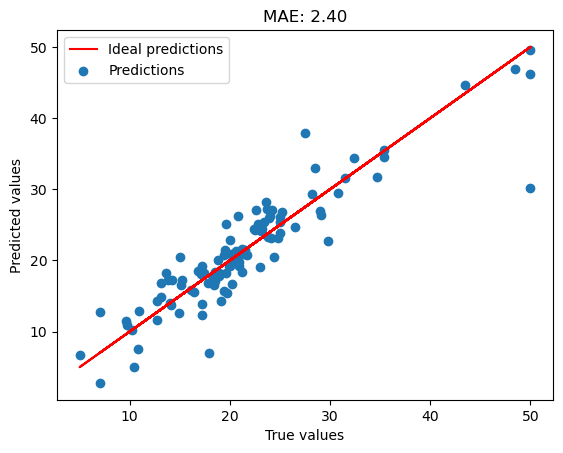

In [10]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


# Load the Boston housing dataset
boston = fetch_openml(name='boston')
data = boston.data
target = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stop])
y_pred = model.predict(X_test_scaled)

# Evaluate the model on the testing set
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Test Set Mean Absolute Error: ", mae)

# Plot the MAE
plt.plot(y_test, y_test, 'r-', label='Ideal predictions')
plt.scatter(y_test, y_pred, marker='o', label='Predictions')
plt.title('MAE: {:.2f}'.format(mae))
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Plot the MAE
def plotMAE(y_pred, title):
    plt.plot(y_test, y_test, 'r-', label='Ideal predictions')
    plt.scatter(y_test, y_pred, marker='o', label='Predictions')
    mae = mean_absolute_error(y_test, y_pred)
    plt.title(title+' {:.2f}'.format(mae))
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.show()


Epoch 1/100
13/13 [==============================] - 2s 50ms/step - loss: 552.5195 - mae: 21.5889 - val_loss: 433.0928 - val_mae: 19.0822
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 444.4030 - mae: 19.0550 - val_loss: 322.4160 - val_mae: 16.2116
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 304.2215 - mae: 15.4023 - val_loss: 187.0479 - val_mae: 12.0153
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 165.6689 - mae: 10.5008 - val_loss: 78.3947 - val_mae: 7.2167
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 77.3736 - mae: 6.8035 - val_loss: 48.5227 - val_mae: 5.0055
Epoch 6/100
13/13 [==============================] - 0s 16ms/step - loss: 52.9201 - mae: 5.6379 - val_loss: 37.3624 - val_mae: 4.2930
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 36.5111 - mae: 4.6148 - val_loss: 30.3311 - val_mae: 3.7656
Epoch 8/100
13/13 [=============================

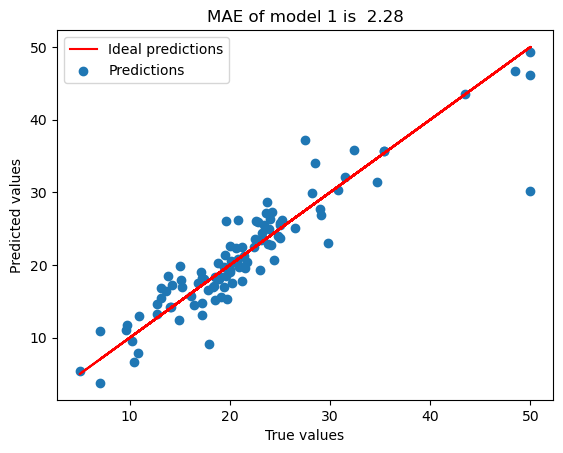

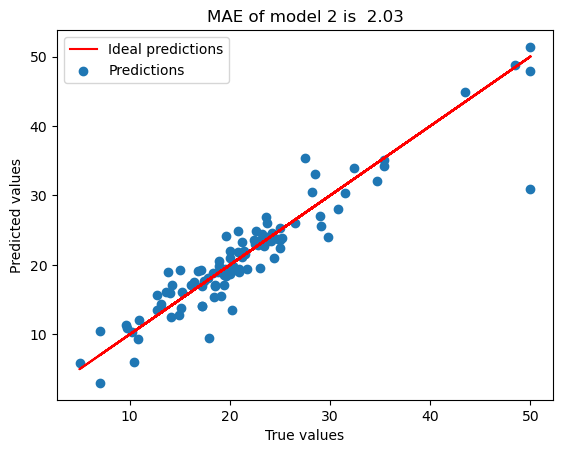

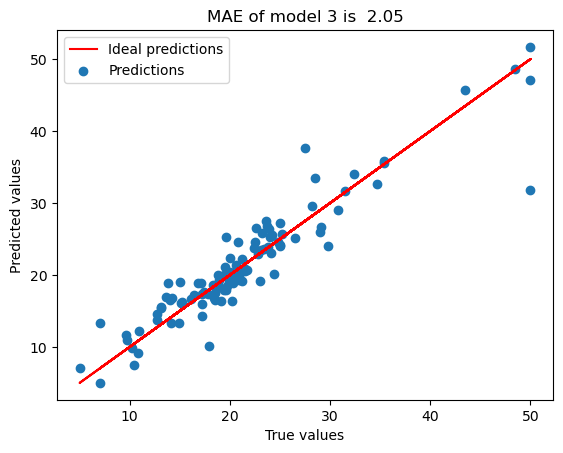

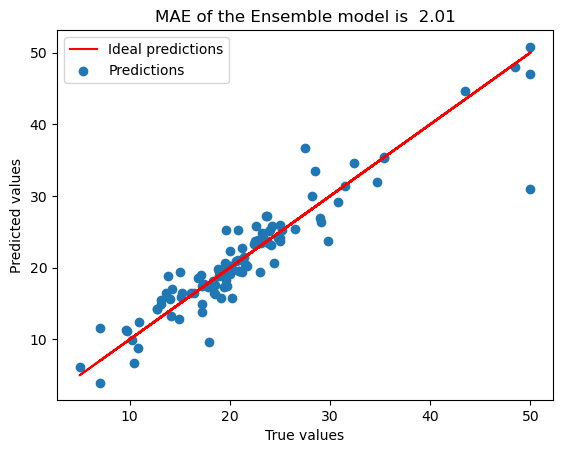

Ensemble MAE: 2.010223708900751


In [13]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from keras.optimizers import Adam

# Load the Boston housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Define three different neural networks with different architectures
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1))

model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))

model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1))

# Compile the models
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model2.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the models
model1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Make predictions with the models
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Plot the MAE of the 3 models
plotMAE(y_pred1,'MAE of model 1 is ')
plotMAE(y_pred2,'MAE of model 2 is ')
plotMAE(y_pred3,'MAE of model 3 is ')
# Combine the predictions
y_pred = (y_pred1 + y_pred2 + y_pred3) / 3.0
plotMAE(y_pred,'MAE of the Ensemble model is ')

# Calculate the MAE of the ensemble
mae = mean_absolute_error(y_test, y_pred)
print('Ensemble MAE:', mae)

